# **Lectura 1: Flujo en redes** 


![](../Images/motivation.png)


## **Introducción a la optimización en redes**

La optimización en redes es un caso particular de programación lineal  que se ocupa del diseño de redes que minimizan o maximizan alguna función objetivo.

 Los problemas de optimización en redes se encuentran en una amplia variedad de aplicaciones, incluyendo la gestión de inventarios, la planificación del transporte y la distribución de energía.

*Un problema de optimización en redes se caracteriza por un conjunto de nodos, un conjunto de arcos que conectan los nodos y un conjunto de restricciones*. Las restricciones pueden ser restricciones de capacidad, restricciones de tiempo o restricciones de costo. El objetivo del problema es encontrar una asignación de flujo a los arcos que satisfaga las restricciones y que minimice o maximice la función objetivo.

Hay una variedad de algoritmos que se pueden utilizar para resolver problemas de optimización en redes. Los algoritmos más comunes son el algoritmo de Ford-Fulkerson, el algoritmo de Dinic y el algoritmo de Push-Relabel.


![](../Images/opti.png)


## **Problemas clásicos de flujo de redes**

Los problemas de flujo de redes son un tipo de problema de programación lineal que se utilizan para modelar y resolver una amplia variedad de problemas del mundo real, como el transporte de bienes, el flujo de información y la asignación de recursos.

Un problema de flujo de redes se puede definir como un conjunto de nodos y arcos, donde cada arco tiene una capacidad asociada. El objetivo es encontrar una asignación de flujo a los arcos que satisfaga ciertas restricciones, como la conservación del flujo y la capacidad máxima de los arcos.


Algunos de los problemas de flujo de redes más comunes son:

- *Problema de la ruta mas corta*: El problema de la ruta más corta es encontrar la ruta más corta entre dos nodos. En un sentido mas amplio responde a la pregunta de cual es la mejor forma de recorrer una red yendo desde un nodo inicial a un nodo final

- *Problema del flujo máximo*: El problema del flujo máximo es encontrar una asignación de flujo a los arcos que maximice el flujo de un nodo a otro respetando la capacidad de los arcos.

- *Problema del flujo mínimo*: El problema del flujo mínimo es encontrar una asignación de flujo a los arcos que minimice el flujo de un nodo a otro.

- *Problema del flujo con costo mínimo*: Considerando que es conocido el custo por unidad eel flujo que pasa en cada arco de la red, que los arcos pueden ser capacitados, y que se requiere enviar unidades de flujo localizados en ciertos nodos (oferta o producción) para otros nodos (demanda o consumo), el problema trata de encontrar una asignación de flujo a los arcos que minimice el costo de transportar un bien de un nodo a otro.



## **Algoritmos para resolver problemas de flujo de redes**

Hay una variedad de algoritmos que se pueden utilizar para resolver problemas de optimización en redes. Los algoritmos más comunes son:

- Algoritmo de Ford-Fulkerson: El algoritmo de Ford-Fulkerson es un algoritmo iterativo que se utiliza para encontrar el flujo máximo en una red.
- Algoritmo de Dinic: El algoritmo de Dinic es un algoritmo más eficiente que el algoritmo de Ford-Fulkerson.
- Algoritmo de Push-Relabel: El algoritmo de Push-Relabel es un algoritmo más eficiente que el algoritmo de Ford-Fulkerson y el algoritmo de Dinic.

## **Ejemplos de problemas de flujo de redes**

A continuación se presentan algunos ejemplos de problemas de flujo de redes que se han resuelto utilizando los algoritmos que discutimos anteriormente:

- *Problema de gestión de inventarios*: Una empresa tiene tres almacenes y dos tiendas. Los almacenes almacenan diferentes productos y las tiendas venden diferentes productos. La empresa quiere encontrar una asignación de flujo a los almacenes y las tiendas que minimice el costo de transportar los productos de los almacenes a las tiendas.

- *Problema de planificación del transporte*: Una empresa tiene tres fábricas y cuatro almacenes. Las fábricas producen diferentes productos y los almacenes almacenan diferentes productos. La empresa quiere encontrar una asignación de flujo a las fábricas y los almacenes que minimice el costo de transportar los productos de las fábricas a los almacenes.

- *Problema de distribución de energía*: Una empresa tiene tres plantas de energía y cuatro ciudades. Las plantas de energía generan electricidad y las ciudades consumen electricidad. La empresa quiere encontrar una asignación de flujo a las plantas de energía y las ciudades que minimice el costo de transportar la electricidad de las plantas de energía a las ciudades.

## **Ejemplo práctico**


**Contexto**: Imagina que eres el encargado de logística de una empresa distribuidora de agua que suministra a una ciudad. La ciudad tiene varios distritos que están conectados por una serie de tuberías. Estas tuberías tienen capacidades diferentes, y necesitas garantizar que el agua llegue a todos los distritos de manera eficiente. 

La fuente del agua es un gran embalse (denominado "s" en nuestro modelo) y hay un distrito principal al que se debe suministrar una gran cantidad de agua (denominado "t"). Sin embargo, el agua no puede ser enviada directamente desde el embalse al distrito principal. En lugar de eso, debe pasar a través de varios distritos intermedios (denominados "a", "b" y "c" en nuestro modelo) que tienen sus propias necesidades y que también deben ser abastecidos.

Tu objetivo es determinar cómo debe fluir el agua a través de esta red de tuberías para maximizar la cantidad de agua que llega al distrito principal, garantizando al mismo tiempo que cada distrito intermedio reciba su suministro adecuado.




***Con este contexto en mente, el código que iremos a ver intenta modelar este escenario:***

- Los nodos representan el embalse, los distritos intermedios y el distrito principal.
- Los bordes (o arcos) representan las tuberías que conectan estos lugares, y el peso de cada borde representa la capacidad máxima de cada tubería.

Al resolver el problema de flujo máximo, estás encontrando la mejor manera de distribuir el agua desde el embalse a través de los distritos intermedios para finalmente llegar al distrito principal, maximizando la cantidad entregada a este último sin violar las restricciones de capacidad de las tuberías.

El flujo en cada borde (tubería) que el modelo proporciona al final indica cuánta agua debería ser enviada a través de cada tubería para lograr este objetivo.



**Nota**: El problema de flujo máximo es un problema de optimización que se puede resolver con el algoritmo de Ford-Fulkerson. Este algoritmo no se implementa en NetworkX, pero se puede encontrar en otros paquetes de Python, como [NetworkX](https://networkx.org/documentation/stable/reference/algorithms/generated/networkx.algorithms.flow.maximum_flow.html). Para más información con relación al paquete de optimización pulp, puedes consultar la [documentación](https://coin-or.github.io/pulp/main/index.html). 


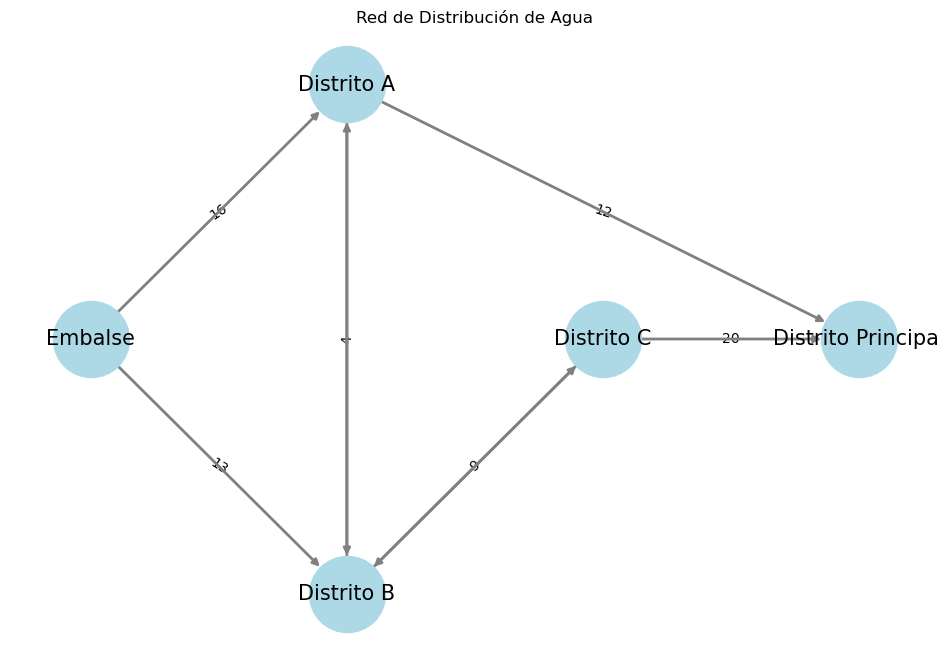

In [1]:
# Importamos las bibliotecas necesarias
import networkx as nx
import matplotlib.pyplot as plt
from pulp import LpMaximize, LpProblem, LpVariable, lpSum, value

# Creamos un gráfico dirigido
G = nx.DiGraph()

# Nombres descriptivos para los nodos
nodes_map = {'s': 'Embalse', 'a': 'Distrito A', 'b': 'Distrito B', 'c': 'Distrito C', 't': 'Distrito Principal'}

# Añadimos los bordes al gráfico junto con sus capacidades (representando las tuberías)
edges = [('s', 'a', 16), ('s', 'b', 13), ('a', 'b', 10), ('a', 't', 12), ('b', 'a', 4), ('b', 'c', 14), ('c', 't', 20), ('c', 'b', 9)]
G.add_weighted_edges_from(edges)

# Creamos un diseño de red personalizado para representar mejor el flujo
pos = {node: coord for node, coord in zip(['s', 'a', 'b', 'c', 't'], [[0, 1], [1, 2], [1, 0], [2, 1], [3, 1]])}

# Visualizamos la red
plt.figure(figsize=(12, 8))
edge_labels = {(u, v): w['weight'] for u, v, w in G.edges(data=True)}
nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels)
nx.draw(G, pos, with_labels=True, labels=nodes_map, node_size=3000, node_color="lightblue", edge_color="gray", font_size=15, width=2)
plt.title("Red de Distribución de Agua")
plt.show()


In [2]:

# --- Modelamos el problema de flujo máximo ---

# Creamos el problema de optimización
prob = LpProblem("MaxFlowProblem", LpMaximize)

# Creamos las variables de flujo para cada borde
flow = {}
for u, v, w in G.edges(data=True):
    flow[(u, v)] = LpVariable(f"flow_{u}_{v}", 0, w['weight'])

# Objetivo: Maximizar el flujo hacia el Distrito Principal
prob += lpSum([flow[(u, 't')] for u in G.predecessors('t')]), "Maximize Flow to Main District"

# Restricciones de conservación de flujo
for node in G.nodes():
    total_flow_in = lpSum([flow[(u, node)] for u in G.predecessors(node)])
    total_flow_out = lpSum([flow[(node, v)] for v in G.successors(node)])
    
    if node == 's':  # Embalse
        prob += total_flow_out == total_flow_in + sum([flow[('s', v)] for v in G.successors('s')])
    elif node == 't':  # Distrito Principal
        prob += total_flow_in == total_flow_out + sum([flow[(u, 't')] for u in G.predecessors('t')])
    else:  # Distritos intermedios
        prob += total_flow_in == total_flow_out

# Resolvemos el problema
prob.solve()


1

In [3]:

# --- Resultados ---

print("Flujo de agua optimizado:\n")
print(f"Flujo máximo hacia el {nodes_map['t']}: {value(prob.objective)} unidades")
for u, v in G.edges():
    print(f"Flujo desde {nodes_map[u]} hacia {nodes_map[v]}: {flow[(u, v)].varValue} unidades")


Flujo de agua optimizado:

Flujo máximo hacia el Distrito Principal: 26.0 unidades
Flujo desde Embalse hacia Distrito A: 13.0 unidades
Flujo desde Embalse hacia Distrito B: 13.0 unidades
Flujo desde Distrito A hacia Distrito B: 1.0 unidades
Flujo desde Distrito A hacia Distrito Principal: 12.0 unidades
Flujo desde Distrito B hacia Distrito A: 0.0 unidades
Flujo desde Distrito B hacia Distrito C: 14.0 unidades
Flujo desde Distrito C hacia Distrito Principal: 14.0 unidades
Flujo desde Distrito C hacia Distrito B: 0.0 unidades
